# Feed Forward Neural Networks :

A fully connected neural network which comprises of n hidden layer and 1 input and 1 output layer.

** Types: **
1. Multi-Layer Perceptrons.
2. Deep Belief Networks.
3. Stacked AutoEncoders.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import tensorflow as tf
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

C:\Users\Prakhar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17329103684785207721
]


#### Getting the data :

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Saving images to file in HDD..
import os
path = "FFNN/"
if not os.path.exists(path):
    os.makedirs(path)
    
inp_data = input_data.read_data_sets(path, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting FFNN/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting FFNN/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting FFNN/t10k-images-idx3-ubyte.gz
Extracting FFNN/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print(inp_data.train.images.shape)
print(inp_data.train.labels.shape)
print(inp_data.test.images.shape)
print(inp_data.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


#### Visualize a single image :

In [5]:
img = inp_data.train.images[0]
img = np.resize(img, (28,28))
lab = inp_data.train.labels[0]
print(lab)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


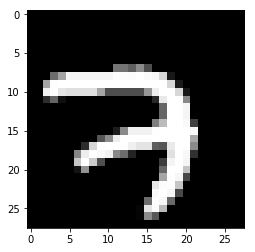

In [6]:
plt.imshow(img, cmap='Greys_r')
plt.show()

## Building neural networks :

### A) Five Layer Neural Network :

1. Layer one - 200 Neurons Sigmoid act.
2. Layer two - 100 Neurons Sigmoid act.
3. Layer three - 60 Neurons Sigmoid act.
4. Layer four - 30 Neurons Sigmoid act.
5. Layer five - 10 Neurons Softmax.

In [7]:
import math
from tensorflow.python.framework import ops
import random

In [8]:
logs_path = 'log_sigmoid/' # logging path
batch_size = 100 # batch size while performing training 
learning_rate = 0.003 # Learning rate 
training_epochs = 10 # training epoch
display_epoch = 1
mnist = input_data.read_data_sets(path, one_hot=True)

Extracting FFNN/train-images-idx3-ubyte.gz
Extracting FFNN/train-labels-idx1-ubyte.gz
Extracting FFNN/t10k-images-idx3-ubyte.gz
Extracting FFNN/t10k-labels-idx1-ubyte.gz


#### Building the input layer :

Input layer a 2d tensor which consist of n samples, each sample has 784 dimensions. Since the number of samples in training dataset can vary, we specify variable number of rows using the "None" option when declaring shape of tensor. Also the tensor which will hold the train data will be a placeholder as it does not need any modification.

In [9]:
X = tf.placeholder(tf.float32, [None, 784], name="InputData") # tensor of input data of size n*784 dimensions
XX = tf.reshape(X, [-1, 784]) # -1 is to transpose
Y_ = tf.placeholder(tf.float32, [None, 10], name="LabelData") # tensor of labels of size n*784

#### Building the first Layer :

Each node in the first layer recieves the pixels of the image combined with the weights and bias term. This layer contains 200 Neurons.

Each node recieves the input as - inp = w(transpose) * x + b

In [10]:
L = 200
# Since the data is 784 dimensional there must be 784 weights and 1 bias.
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # initializing random weights for layer 1.
B1 = tf.Variable(tf.zeros([L])) # Bias vector for layer 2.

# The output is calculated as wtranspose * x + b or xtranspose * w + b and then sigmoid function is applied on it.
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)

#### Building the second Layer :

The second layer recieves as input the output of previous layer that is Y1. And again multiples the Y1 with weights and adds a bias term to generate output.

In [11]:
M = 100

W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # initializing random weights for layer 2.
B2 = tf.Variable(tf.zeros([M])) # Bias vector for layer 2.

# The output now -
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

#### Building the third layer:

In [12]:
N = 60
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1)) # Initialize random weights for the hidden layer 3 
B3 = tf.Variable(tf.zeros([N])) # Bias vector for layer 3

Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3) # Output from layer 3

#### Building the fourth layer :

In [13]:
O = 30
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1)) # Initialize random weights for the hidden layer 4
B4 = tf.Variable(tf.zeros([O])) # Bias vector for layer 4

Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4) # Output from layer 4

#### Building the fifth layer:

In [14]:
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1)) # Initialize random weights for the hidden layer 5 
B5 = tf.Variable(tf.zeros([10])) # Bias vector for layer 5
Ylogits = tf.matmul(Y4, W5) + B5 # computing the logits
Y = tf.nn.softmax(Ylogits)# output from layer 5

In [15]:
# Cross entropy is basically our logistics loss for multiclass.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_) # final outcome using softmax cross entropy
cost_op = tf.reduce_mean(cross_entropy)*100

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
# Prediction is correct if output is equal to actual Y_ is actual, Y is predicted
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Training :

In [17]:
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)

In [18]:
# Create a summary to monitor cost tensor
tf.summary.scalar("cost", cost_op)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy)
# Merge all summaries into a single op
summary_op = tf.summary.merge_all()

In [19]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
with tf.Session() as sess:
    # Run the initializer
    sess.run(tf.global_variables_initializer())
    
    # op to write logs to TensorBoard
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    for epoch in range(training_epochs):
        # Get total number of batches..
        batch_count = int(mnist.train.num_examples/batch_size)
        for i in range(batch_count):
            # Get data of current batch..
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # feed_dict parameter is used to pass data to tf.Variable
            _,summary = sess.run([train_op, summary_op], feed_dict={X: batch_x, Y_: batch_y})
            # Write data to be displayed by tensorboard..
            writer.add_summary(summary, epoch * batch_count + i)
               
        print("Epoch: ", epoch)
        
    print("Optimization Finished!")
    print("Accuracy: ", accuracy.eval(feed_dict={X: mnist.test.images, Y_: mnist.test.labels}))
    sess.close()

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Optimization Finished!
Accuracy:  0.9748


### B) Multi-Layer Perceptron : 

1. Also a Feed Forward Neural Network.
2. Completely Connected.
3. Can be used for classification and regression.

#### Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons

n_hidden_2 = 128 # 2nd layer number of neurons

n_input = 784 # MNIST data input (img shape: 28*28)

n_classes = 10 # MNIST total classes (0-9 digits)

In [20]:
# Input layer placeholders :
X = tf.placeholder(tf.float32, [None, 784])
Y_true = tf.placeholder(tf.float32, [None, 10])

In [21]:
# Layer Weights and Biases :

weights = {
    'w1' : tf.Variable(tf.random_normal([784, 512], stddev=0.039, mean=0)), # No. of weights=neuron in input * nuerons in hidden 
    'w2' : tf.Variable(tf.random_normal([512, 128], stddev=0.052, mean=0)),
    'w3' : tf.Variable(tf.random_normal([128, 10] , stddev=0.120, mean=0)) # Output layer weights
}

biases = {
    'b1' : tf.Variable(tf.random_normal([512])), # No. of biases = No. of neurons in next layer
    'b2' : tf.Variable(tf.random_normal([128])),
    'b3' : tf.Variable(tf.random_normal([10]))
}

In [25]:
# defining the architecture:
def MultilayerPerceptron(X, w, b):
    
    # First hidden layer takes input (x*W + B) (input layer has n*784 shape, 1st hidden layer has 784*512 shape)
    # x*w will give n*512, x*w + b is also n*512 shape. sigmoid is applied on this and output is generated which is fed as 
    # input to next layer.
    layer_1 = tf.nn.sigmoid( tf.add( tf.matmul(X, w['w1']), b['b1'] ) )
    
    # Layer 2 recives input as output_layer_1 * w2 + b, sigmoid is applied on it and output is generated.
    layer_2 = tf.nn.sigmoid( tf.add( tf.matmul(layer_1, w['w2']), b['b2'] ) )
    
    # Layer 3 i.e output layer...
    layer_3 = tf.nn.sigmoid( tf.add( tf.matmul(layer_2, w['w3']), b['b3'] ) )
    
    return layer_3

In [89]:
# Get predictions
predictions = MultilayerPerceptron(X, weights, biases)

# Calculate Multiclass Logistsics Loss using labels and predictions
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=Y_true))

# Reduce the loss using AdamOptimizer..
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# Merge all summaries into a single op
summary_op = tf.summary.merge_all()

# Run multiple epochs :
with tf.Session() as sess:
    # This is similar to declaring variables to be used.
    sess.run(tf.global_variables_initializer())
    
    # For plotting we store error for train and test for each epoch
    train_error = []
    test_error = []
    epoch_counter = []
    # Select batch size and compute total number of batches in the epoch.
    batch_size = 1000
    total_batches = int(mnist.train.num_examples/batch_size)
    
    # Define number of epochs.
    num_epochs = 15
    
    
    for epoch in range(num_epochs):
        train_avg_cost = 0.0
        test_avg_cost = 0.0
        batchnum = 0
        for i in range(total_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run the optimizer for this batch calculate errors and store in the list. It also returns train error (loss)
            sess.run(optimizer, feed_dict={X: batch_x, Y_true: batch_y})
            loss_batch = sess.run(loss, feed_dict={X: batch_x, Y_true: batch_y})
            train_avg_cost += loss_batch/total_batches
            
            # Compute loss for test set
            loss_test = sess.run(loss, feed_dict={X: mnist.test.images, Y_true: mnist.test.labels})
            test_avg_cost += loss_test/total_batches
            
        if(epoch % 1 == 0):
            print("Epoch: ", "%02d" % (epoch+1),"  Train error={:.9f}".format(train_avg_cost),"  Test error={:.9f}".format(test_avg_cost))
        # Append losses for this current epoch
        train_error.append(train_avg_cost)
        test_error.append(test_avg_cost)
        epoch_counter.append(epoch)
        
    # Get final accuracy on test after training ...
    l1_w = weights['w1'].eval()
    l2_w = weights['w2'].eval()
    l3_w = weights['w3'].eval()
    
    correct_predictions = tf.equal( tf.argmax(predictions, 1), tf.argmax(Y_true, 1) )
    accuracy = tf.reduce_mean( tf.cast(correct_predictions, tf.float32) )
    # accuracy.eval is similar to sess.run(accuracy)
    print("Accuracy : ", accuracy.eval(feed_dict={X: mnist.test.images, Y_true: mnist.test.labels}) )
    sess.close()

Epoch:  01   Train error=1.603852090   Test error=1.605850133
Epoch:  02   Train error=1.503637463   Test error=1.507193314
Epoch:  03   Train error=1.489062827   Test error=1.494293124
Epoch:  04   Train error=1.482033452   Test error=1.489345791
Epoch:  05   Train error=1.477778717   Test error=1.485358750
Epoch:  06   Train error=1.474917197   Test error=1.483702467
Epoch:  07   Train error=1.472594396   Test error=1.482702476
Epoch:  08   Train error=1.471406024   Test error=1.482750667
Epoch:  09   Train error=1.470079327   Test error=1.481498883
Epoch:  10   Train error=1.469366444   Test error=1.481461759
Epoch:  11   Train error=1.468815836   Test error=1.481138008
Epoch:  12   Train error=1.467888269   Test error=1.480362834
Epoch:  13   Train error=1.467331251   Test error=1.480754024
Epoch:  14   Train error=1.466793292   Test error=1.481036091
Epoch:  15   Train error=1.467172098   Test error=1.481394213
Accuracy :  0.9785


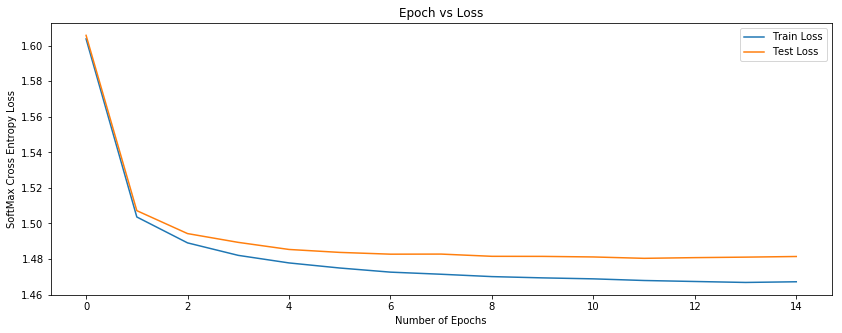

In [90]:
# display training and test accuracy curves vs epochs..
plt.figure(figsize=(14,5))
plt.title("Epoch vs Loss")
plt.ylabel("SoftMax Cross Entropy Loss")
plt.xlabel("Number of Epochs")
plt.plot(epoch_counter, train_error, label="Train Loss")
plt.plot(epoch_counter, test_error, label="Test Loss")
plt.legend()
plt.show()

In [104]:
# Sometime a neural net can suffer from vanishing gradient or exploding gradient problem..
# We need to check the weights to see if this is the case with out neural network..
l1_w = l1_w.flatten().reshape(-1, 1)
l2_w = l2_w.flatten().reshape(-1, 1)
l3_w = l3_w.flatten().reshape(-1, 1)

C:\Users\Prakhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


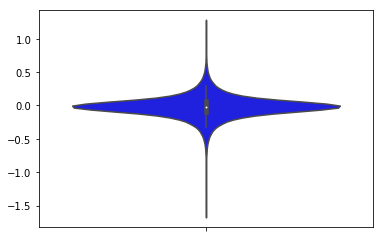

In [105]:
sns.violinplot(y=l1_w, color='b')
plt.show()

C:\Users\Prakhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


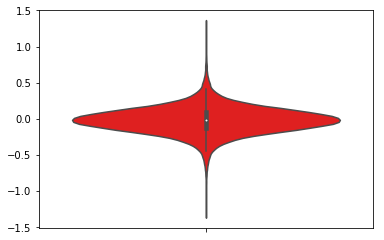

In [107]:
sns.violinplot(y=l2_w, color='r')
plt.show()

C:\Users\Prakhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


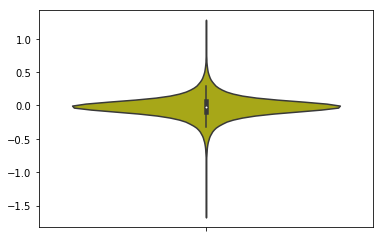

In [109]:
sns.violinplot(y=l1_w, color='y')
plt.show()

> The weights seem alright they dont seem to be too small and they certainly arent that big. So i think we have trained our model just okay no problem of vanishing gradient or exploding gradient.